# 분류

## 지도학습
> 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
## 지도학습의 대표적인 유형 중 분류
> 학습 데이터로 주어진 데이터의 feature와 label값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
> 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤 새롭게 관측된 데이터에 대한 label을 판별하는 것
## 결정 트리
> 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것


> 이때, 트리의 깊이가 길어진다는 것은 결정 트리의 예측 성능이 저하될 수 가능성 높아진다는 것 -> 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야함 ->  결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 세트를 만듦


> 정보 이득: 1 - 엔트로피(=주어진 데이터의 혼잡도)지수

> 지니 계수: 0(평등)~1(불평등)

> 특징: '균일도'를 기반으로 하고 있어 알고리즘이 쉽고 직관적임

## 앙상블 학습
> 여려 개의 Classifier를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출

> 보팅, 배깅, 부스팅 3가지로 나눔
>> - Voting: 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합
>> - Bagging: 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 Voting을 수행하는 것
>> - Boosting: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측을 할 수 있도록 다음 분류기에 가중치를 부여하며 학습과 예측을 진행

### 보팅
> - Hard Voting: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏괎으로 선정하는 것
> - Soft Voting: 분류기의 레이블값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것

In [1]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




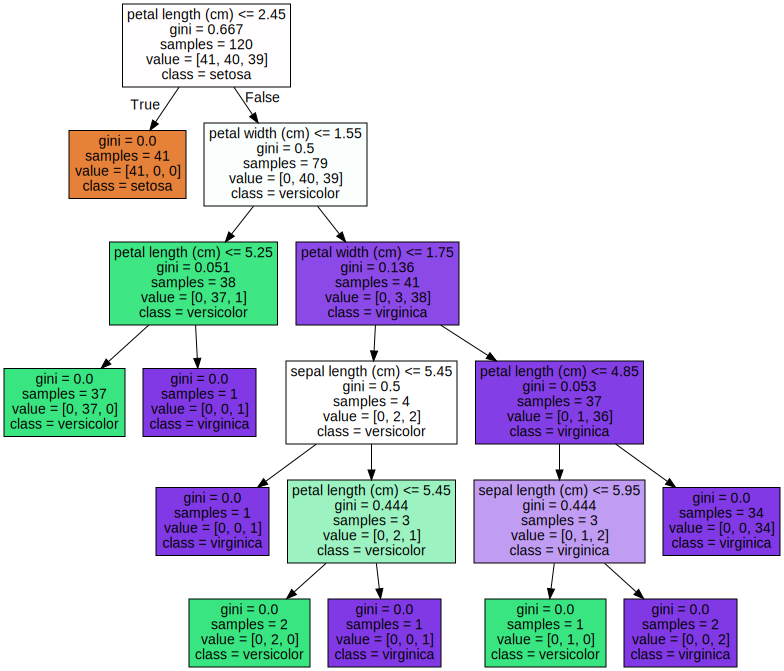

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성 
dt_clf=DecisionTreeClassifier(random_state=156)
#붓꽃 데이터 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(x_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True, filled=True)

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- 이때 value=[] 클래스값 기반의 데이터 건수, 각 순서대로 Setosa,Vesicolor, Virginica
- samples 현 규칙에 해당하는 데이터 건수
- class=versicolor는 하위 노드를 가질 경우 versicolor의 개수가 가장 많다는 의미

#### max_depth 하이퍼 파라미터 변경에 따른 트리 변화
- 트리의 최대 높이를 규정
- 디폴트값은 None으로 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
- 깊이가 깊어지면 min_samples_split의 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 제어가 필요

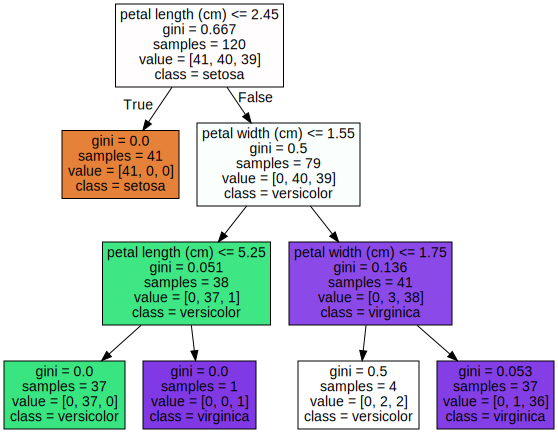

In [9]:
#DecisionTree Classifier 생성 
dt_clf=DecisionTreeClassifier(random_state=156, max_depth=3)
#붓꽃 데이터 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(x_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True, filled=True)

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#### min_samples_split 하이퍼 파라미터 변경에 따른 트리 변화
- 노드를 분할하기 위한 최소한의 샘플 데이터 수
- 디폴트 2, 작게 설정할 수록 분할하는 노드가 많아져서 과적합 가능성 증가

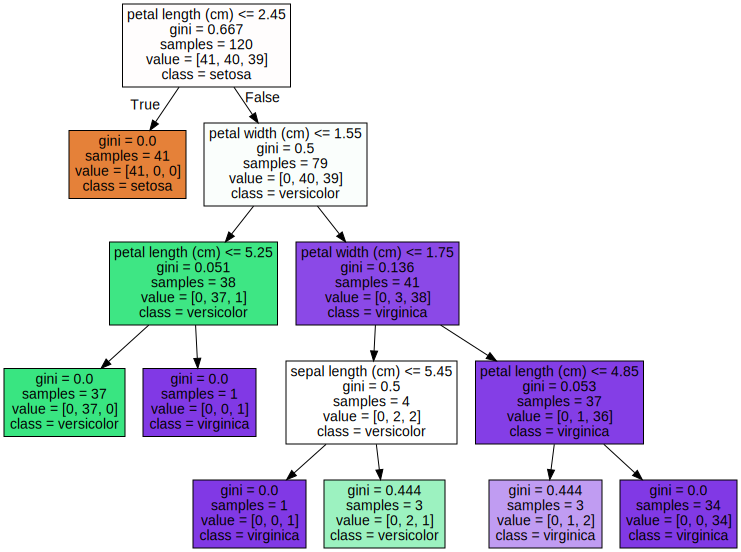

In [10]:
#DecisionTree Classifier 생성 
dt_clf=DecisionTreeClassifier(random_state=156, min_samples_split=4)
#붓꽃 데이터 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(x_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True, filled=True)

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#### min_samples_leaf 하이퍼 파라미터 변경에 따른 트리 변화
- 말단 노드(leaf)가 되기 위한 최소한 샘플 데이터 수
- 과적합 제어 용도
- 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요

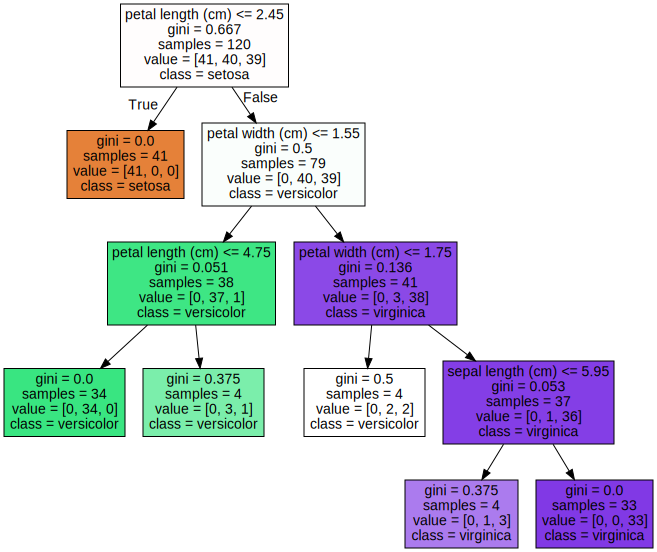

In [11]:
#DecisionTree Classifier 생성 
dt_clf=DecisionTreeClassifier(random_state=156, min_samples_leaf=4)
#붓꽃 데이터 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(x_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True, filled=True)

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier의 객체 feature_importances_ 속성으로 제공

Feature importance:
[0.006 0.    0.546 0.448]
sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


<AxesSubplot:>

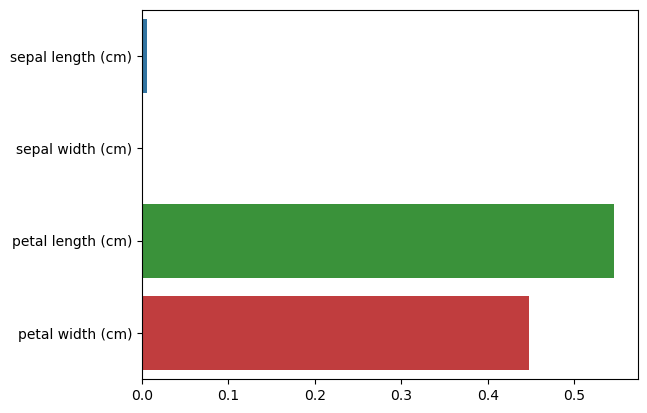

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
    
#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

#### 결정 트리 과적합 Overfitting

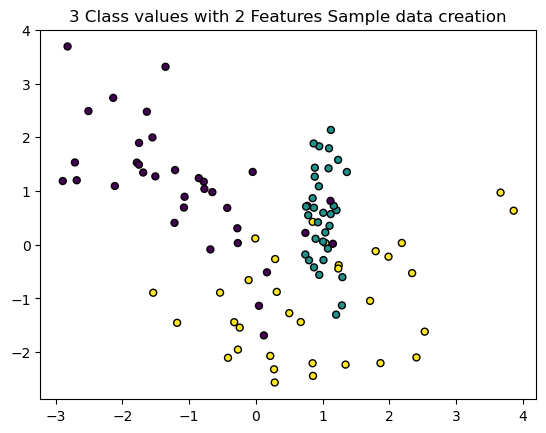

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
x_features,y_labels=make_classification(n_features=2, n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시
plt.scatter(x_features[:,0],x_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

In [17]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

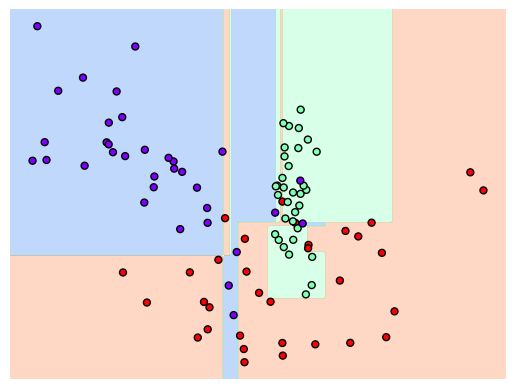

In [18]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리 학습과 경계 시각화
dt_clf=DecisionTreeClassifier().fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)


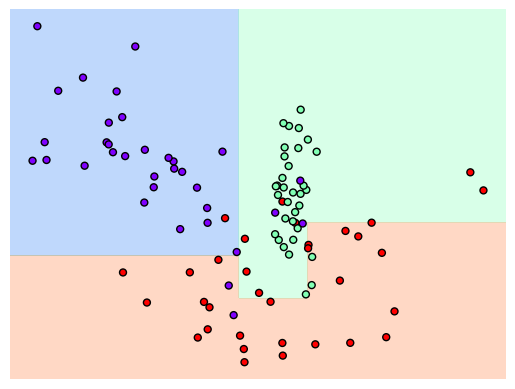

In [19]:
#min_samples_leaf=6으로 생성조건 제약한 결정 트리 학습과 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

### 보팅 분류기(Voting Classifier)

In [23]:
#보팅 분류기(Voting Classifier)

import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer=load_breast_cancer()
data_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [58]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/MYCOM/data/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv("C:/Users/MYCOM/data/X_train.txt",sep='\s+', names=feature_name )
    X_test = pd.read_csv("C:/Users/MYCOM/data/X_test.txt",sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv("C:/Users/MYCOM/data/y_train.txt",sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv("C:/Users/MYCOM/data/y_test.txt",sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [59]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
x_train,x_test,y_train,y_test=get_human_dataset( )


#VotingClassifier 학습/예측/평가
vo_clf.fit(x_train,y_train)
pred=vo_clf.predict(x_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도:{1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9559
LogisticRegression 정확도:0.9579
KNeighborsClassifier 정확도:0.9074


### 배깅 랜덤포레스트

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()이용
x_train,x_test,y_train,y_test=get_human_dataset()
#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가 
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(x_train,y_train)
pred=rf_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤 포레스트 정확도:0.9253


In [63]:
# 랜덤 포레스트 하이퍼 파라미터 굉장히 많음. 튜닝을 위한 시간 소모

from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100],
       'max_depth':[6,8,10,12],
       'min_samples_leaf':[8,12,18],
       'min_samples_split':[8,16,20]}
#RandomForestClassifier에서 객체 생성 후 GridSearchCV 수행 
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(x_train,y_train)
print('최적 하이퍼 파리미터: \n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파리미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


In [64]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,min_samples_split=8,random_state=0)
rf_clf1.fit(x_train,y_train)
pred=rf_clf1.predict(x_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9165


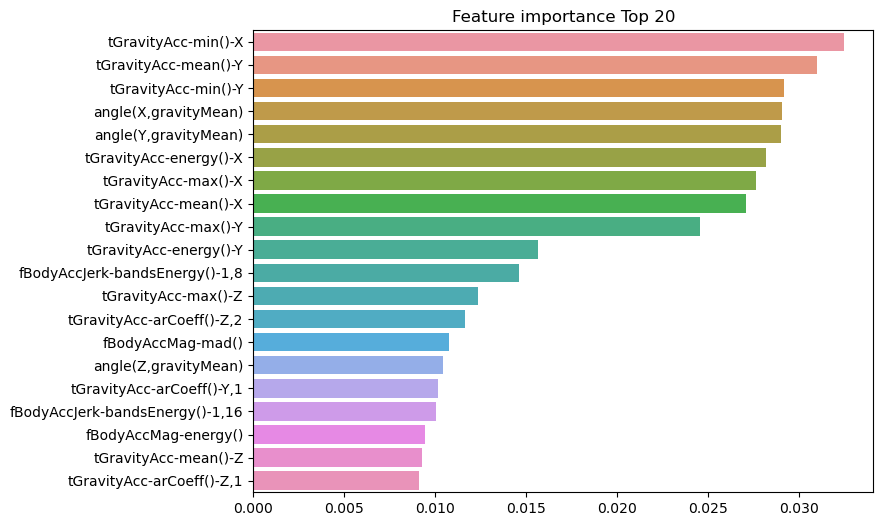

In [65]:
#피처 중요도를 막대그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=x_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

### 부스팅 GBM: Gradient Boosting Machine

> 여러개의 학습기를 순차적으로 학습-예측하며너 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

> AdaBoost: 오류 데이터에 가중치를 부여
> GBM: 가중치 업데이트를 경사 하강법 이용

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time=time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train,y_train)
gb_pred=gb_clf.predict(x_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간:{0:.1f}초'.format(time.time()-start_time))

In [ ]:
# GBM 하이퍼 파리미터 튜닝
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(x_train, y_train.values)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용해 최적을 학습된 estimator로 예측 수행

gb_pred=grid_cv.best_estimator_.predict(x_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print('GBM 정확도:{0:.4f}'.format(gb_accuracy))